Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
## Esto es para que el plot siempre se haga aunque no sea lo último que aparece en la celda. 
%matplotlib inline  
pd.set_option('display.max_columns', None)

In [11]:
df=pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [12]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [13]:
df.shape

(2443651, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [15]:
df.columns=df.columns.str.lower().str.replace(" ","_")

In [16]:
df.head()

,uid,asin,title,stars,reviews,price,isbestseller,boughtinlastmonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [17]:
df.category.nunique()

296

In [18]:
listed_categories=df.category.value_counts().sort_values(ascending=False)
listed_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [19]:
top_5_listed_categories=df.category.value_counts().sort_values(ascending=False).head(5)
top_5_listed_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

/tmp/ipykernel_31972/1944797684.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


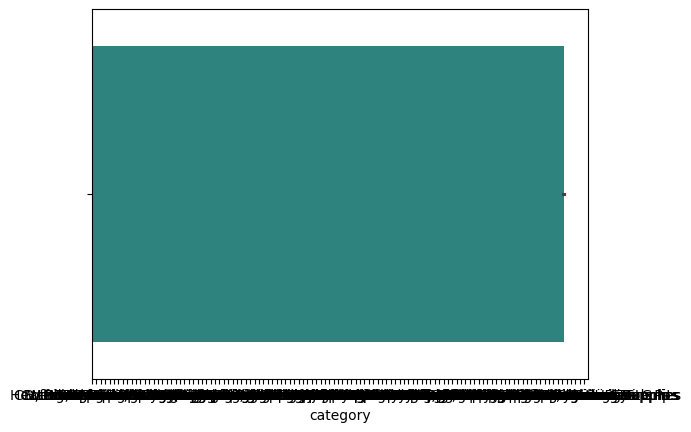

In [20]:
sns.barplot(
    x='category',
    data=df,
    palette='viridis',
)
plt.show()

Since the plot is unreadable due to over 200 different categories, we will create a subset displaying only the 10 most representative categories.

In [21]:
top_10_categories=df.category.value_counts().sort_values(ascending=False).head(10).index
top_10_categories

Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts', 'Manicure & Pedicure Products',
       'Skin Care', 'Make-up', 'Hair Care', 'Fragrances'],
      dtype='object', name='category')

In [22]:
df_top_10_categories=df[df["category"].isin(top_10_categories)]

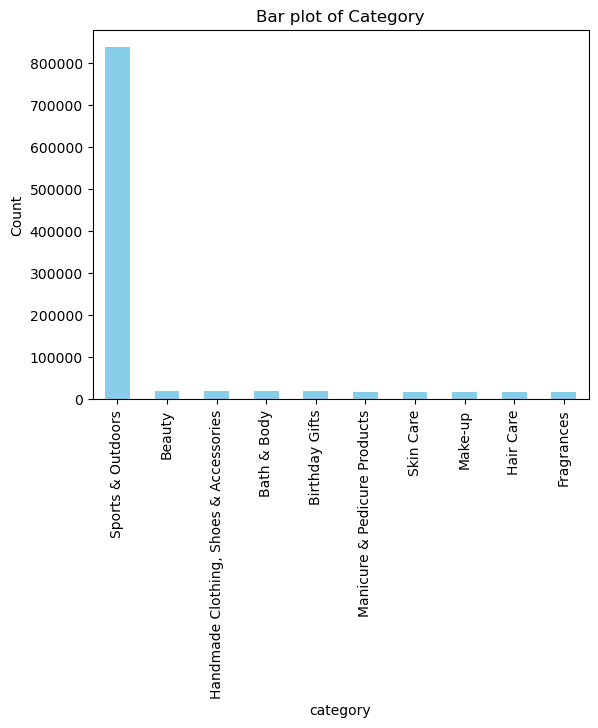

In [23]:
df_top_10_categories['category'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('category')
plt.ylabel('Count')
plt.title('Bar plot of Category')
plt.show()

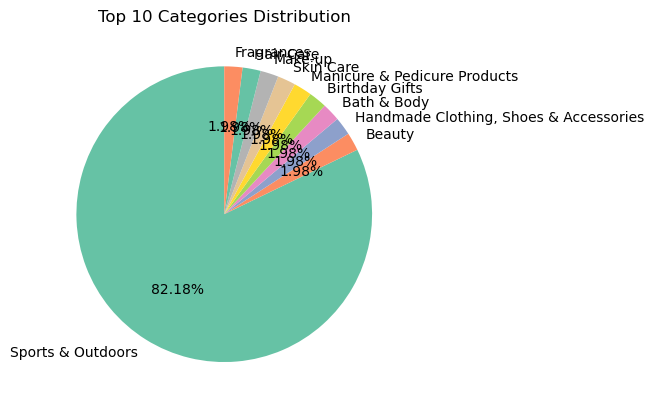

In [24]:
# Remember to make a value_counts when making a pie plot
df_top_10_categories['category'].value_counts(normalize=True).round(2).plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.ylabel('')  
plt.title('Top 10 Categories Distribution')
plt.show()

In [25]:
print(df_top_10_categories.dtypes)

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isbestseller            bool
boughtinlastmonth      int64
category              object
dtype: object


We observe that the categorization is incorrect, or at least that the size of the most represented category is significantly larger than the others. A possible solution could be to create more specific subcategories within the 'Sports & Outdoors' category.


# Part 2: 

Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [26]:
df.head(1)

,uid,asin,title,stars,reviews,price,isbestseller,boughtinlastmonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [27]:
df.price.describe().reset_index()

,index,price
0,count,2.443651e+06
1,mean,8.924381e+01
2,std,3.456089e+02
3,min,0.000000e+00
4,25%,9.990000e+00
5,50%,1.909000e+01
6,75%,4.599000e+01
7,max,1.000000e+05


We observe that the mean is significantly higher than the median, suggesting that a small number of very high prices are skewing the mean upwards. While some products are free (minimum = £0), the most expensive item is listed at £100,000. Given that 75% of products are priced below £46, it’s likely that the high mean and maximum price are driven by a few very expensive products. The range is £100,000, calculated as the difference between the maximum and minimum prices, indicating a very wide spread.

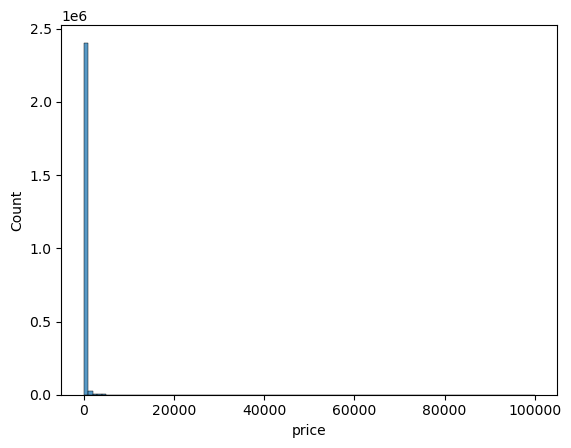

In [33]:
sns.histplot(df.price, bins=100)
plt.show()

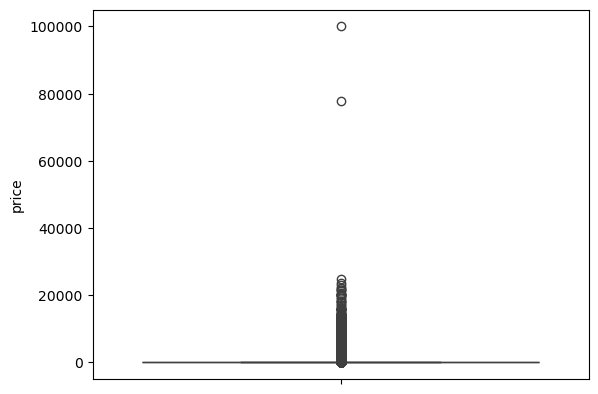

In [34]:
sns.boxplot(data=df.price)
plt.show()

Regarding the data, we can observe that the central area where price values are clustered is around 49 pounds. However, due to the wide range (up to 100,000 pounds), the resolution of the plots does not allow us to see any dispersion around the mean area, as it appears to be close to zero. This is why every price over 100 pounds is considered an outlier, which is not accurate.


# Part 3: 
Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [29]:
df.stars.describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

Due to people either not voting at all or giving a rating of 0, it appears that the majority of products are poorly rated, as over half of them (the median) have a 0-star rating. Regarding the interquartile range, we can see that in Q3, the rating is 4.40. The mean rating is 2.15 stars, which suggests that higher ratings help raise this average. Nevertheless, the standard deviation is 2.19, and given that the maximum rating is 5 stars, we can consider this a relatively high standard deviation.

In [30]:
df.stars.skew().round(2)

0.08

In [31]:
df.stars.kurtosis().round(2)

-1.93

We can see that the distribution is almost symmetrical, with a skewness value of 0.08. Additionally, the kurtosis is -1.93, indicating that the distribution has less concentration of values around the center than would be expected in a normal distribution.

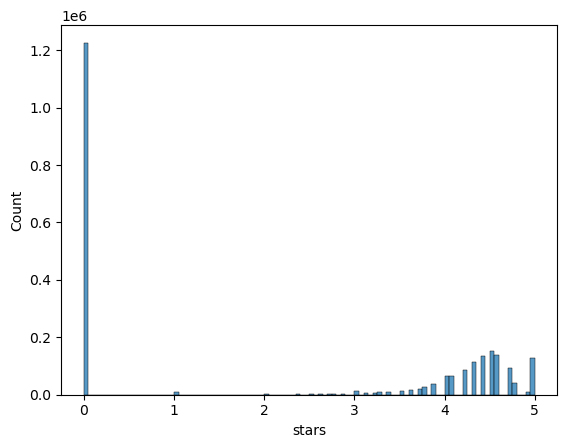

In [32]:
sns.histplot(df.stars, bins=100)
plt.show()

As mentioned before, we can see that the high ranking of 0-star ratings is due to people who do not rate the product, or because those who are upset about unmet expectations are the ones eager to rate the product. In contrast, the majority of customers do not leave a rating if their expectations are fulfilled.